In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loans = pd.read_excel("train.xlsx")
loans.drop(columns= ["id"], inplace=True)
loans["loan_status"]=loans["loan_status"].map(lambda x: "yes" if x == 1 else "no")

In [4]:
loans.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,no
1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,no
2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,no
3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,no
4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,no


Displaying Summary Statistics

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  int64  
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.4+ MB


In [6]:
loans.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [8]:
loans.describe(include=[object])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan_status
count,58645,58645,58645,58645,58645
unique,4,6,7,2,2
top,RENT,EDUCATION,A,N,no
freq,30594,12271,20984,49943,50295


Data Exploration

Distribution Of Age

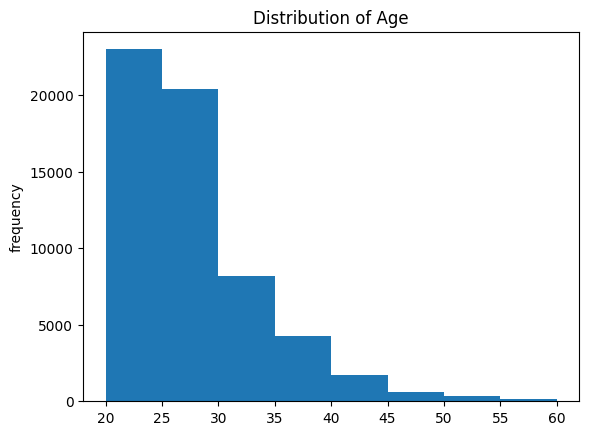

In [10]:
#distribution of age
fig, ax = plt.subplots()
bins = np.arange(start=20, stop=65, step=5)
ax.hist(loans.person_age, bins=bins)
ax.set(ylabel="frequency", title="Distribution of Age")
plt.show()

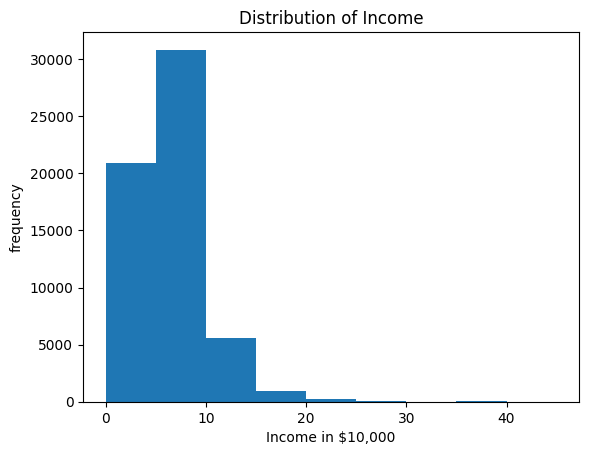

In [17]:
#distribution of Income
fig, ax = plt.subplots()
bins = np.arange(start=0, stop=50, step=5)
ax.hist(loans.person_income/pow(10, 4), bins)
ax.set(ylabel="frequency", title="Distribution of Income", xlabel="Income in $10,000")
plt.show()

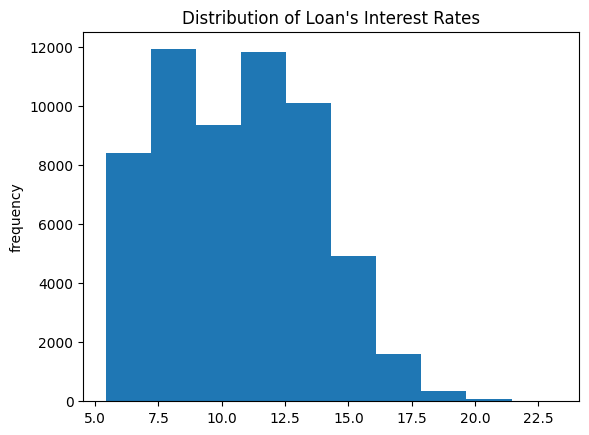

In [22]:
fig, ax = plt.subplots()
bins = np.arange(start=20, stop=65, step=5)
ax.hist(loans.loan_int_rate)
ax.set(ylabel="frequency", title="Distribution of Loan's Interest Rates")
plt.show()

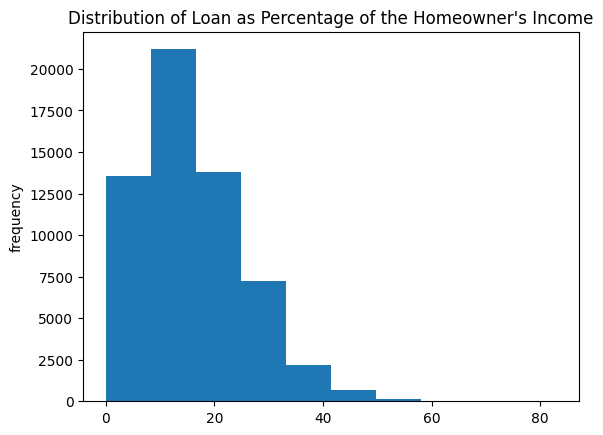

In [24]:
fig, ax = plt.subplots()
bins = np.arange(start=20, stop=65, step=5)
ax.hist(loans.loan_percent_income*100)
ax.set(ylabel="frequency", title="Distribution of Loan as Percentage of the Homeowner's Income")
plt.show()

Measuring Relationships Between Variables and Loan Acceptance

<Axes: >

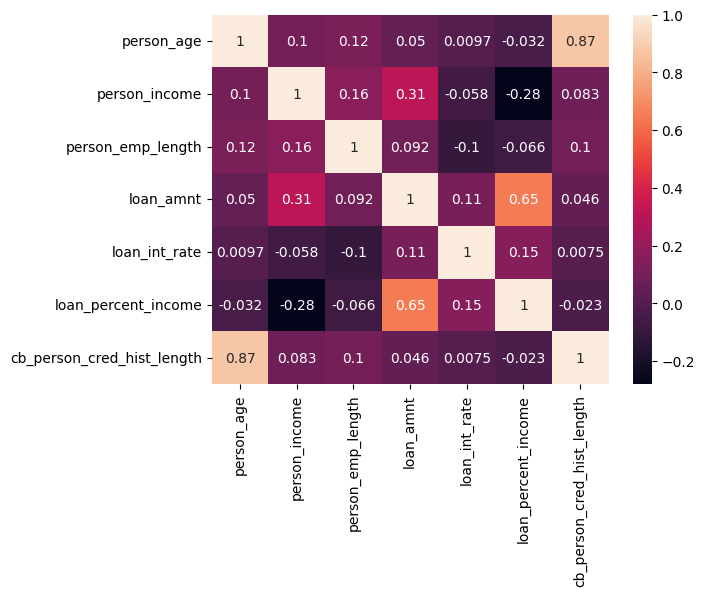

In [26]:
sns.heatmap(data=loans.corr(numeric_only=True),annot=True)